# DATA ANALYSIS OF GOOGLE'S APP RATINGS

## Findings:

1. Almost all the features are categorical in nature, except the Rating one. 
2. There are very low percentage around 14% null values in the dataset. This is low, so we can ignore this. We can use median values to fill in the Rating NA values
3. Analyzing the Rating feature:
    - We get an outlier in the rating column above 17.5, which is definitely wrong, since the rating ranges from 0 to 5. So, we can drop this outlier.
    - The histogram illustrates that the rating feature is right skewed
    

4. Top 5 categories of Apps on the Store : Family > Games > Tools > Medical > Business
5. Least 5 categories of Apps on the Store : Beauty < Parenting < Comics < Art & Design < Events

6. Top 5 Genres of Apps on the Store : Tools > Entertainment > Education > Medical > Business
7. Least 5 Genres of Apps on the Store : Communication; Creativity < Health & Fitness;Action & Adventure < Strategy;Education < Music & Audio;Music & Video < Books & Reference;Creativity


8. Bivariate Analysis:
    --- Correlation
        - Rating is slightly negatively correlated with Reviews, Installs, Price features
        - Reviews is more positively correlated with Installs and marginally with Ratings while marginally negative with Price
        - Installs is marginally negative correlated with Price
        - There is very low effect of Rating, Reviews and Installs on Price.

            - More important factor to consider here is the positive correlation between Installs and Reviews. More installations lead to Cutomer posting their Reviews
            

    --- Top 5 categories by Ratings are : Events, Education, Art & Design, Books & Preference, Personalization
    --- Last 5 categories by Rating are : Entertainment, Video Players, Tools, Maps and Navigation, Dating


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import Re

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
df.isnull().sum() 

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

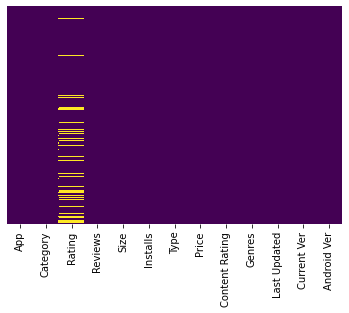

In [8]:
sns.heatmap(data = df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [9]:
for col in df.columns:
    print(f"The percentage of missing values in {col} is {np.round(df[col].isnull().sum() * 100/len(df), 2)} %")

The percentage of missing values in App is 0.0 %
The percentage of missing values in Category is 0.0 %
The percentage of missing values in Rating is 13.6 %
The percentage of missing values in Reviews is 0.0 %
The percentage of missing values in Size is 0.0 %
The percentage of missing values in Installs is 0.0 %
The percentage of missing values in Type is 0.01 %
The percentage of missing values in Price is 0.0 %
The percentage of missing values in Content Rating is 0.01 %
The percentage of missing values in Genres is 0.0 %
The percentage of missing values in Last Updated is 0.0 %
The percentage of missing values in Current Ver is 0.07 %
The percentage of missing values in Android Ver is 0.03 %


There are very low percentage around 14% null values in the dataset. This is low, so we can ignore this. We can use median values to fill in the Rating NA values

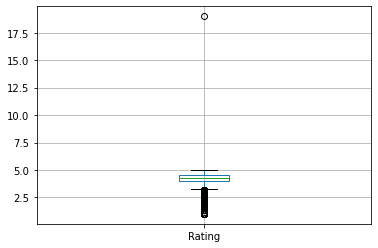

In [10]:
df.boxplot()

We get an outlier in the rating column above 17.5, which is definitely wrong, since the rating ranges from 1 to 5. So, we can drop this outlier.

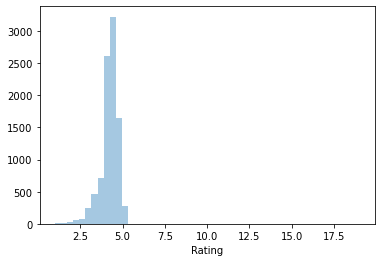

In [11]:
sns.distplot(df['Rating'], kde= False)

The histogram illustrates that the rating feature is right skewed

### Data Cleaning

#### 1. Outlier Removal

In [12]:
df[df['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
df.drop([10472], axis= 0, inplace = True)

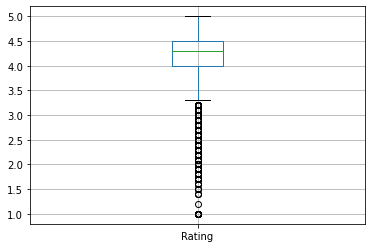

In [14]:
df.boxplot()

##### 2. Missing Value Treatment

In [15]:
# df['Rating'] = df['Rating'].fillna(df['Rating'].median())

In [16]:
df = df.fillna({
    'Rating': df['Rating'].median()
    })

In [17]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [18]:
df.dropna(axis= 0, how= 'any', inplace= True)

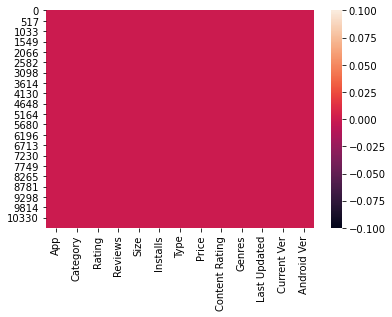

In [19]:
sns.heatmap(df.isnull())

#### Changing the data type of few categorical columns to numerical columns

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [21]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [22]:
# changing the data type of Price columns from object to float
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x)).astype(float)

In [23]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [24]:
# changing the dtype of column 'Reviews' to integer type
df['Reviews'] = df['Reviews'].astype(int)

In [25]:
# changing the dtype of Installs column

def convert_install(val):
    new = val.replace('+', '').replace(',', '')
    return new

In [26]:
df['Installs'] = df['Installs'].apply(convert_install).astype(float)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  int32  
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  float64
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  float64
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(3), int32(1), object(9)
memory usage: 1.1+ MB


In [102]:
# changing size
def convert_size(val):
    if ('k' in str(val)):
        a = str(val).replace('k', '')
        a = np.float(a)* 0.001
        return a
    
    elif ('M' in str(val)):
        b = str(val).replace('M', '')
        b = np.float(b)
        return b
    
    else:
        return np.float(val)

In [105]:
a= '19M'
x = convert_size(a)
print(x)

19.0


In [104]:
df.Size[0]

'19M'

In [103]:
df['Size'] = df['Size'].apply(convert_size)

ValueError: could not convert string to float: 'Varies with device'

## Univariate Analysis

In [55]:
sns.set_style(style = 'whitegrid')

<Figure size 1152x576 with 0 Axes>

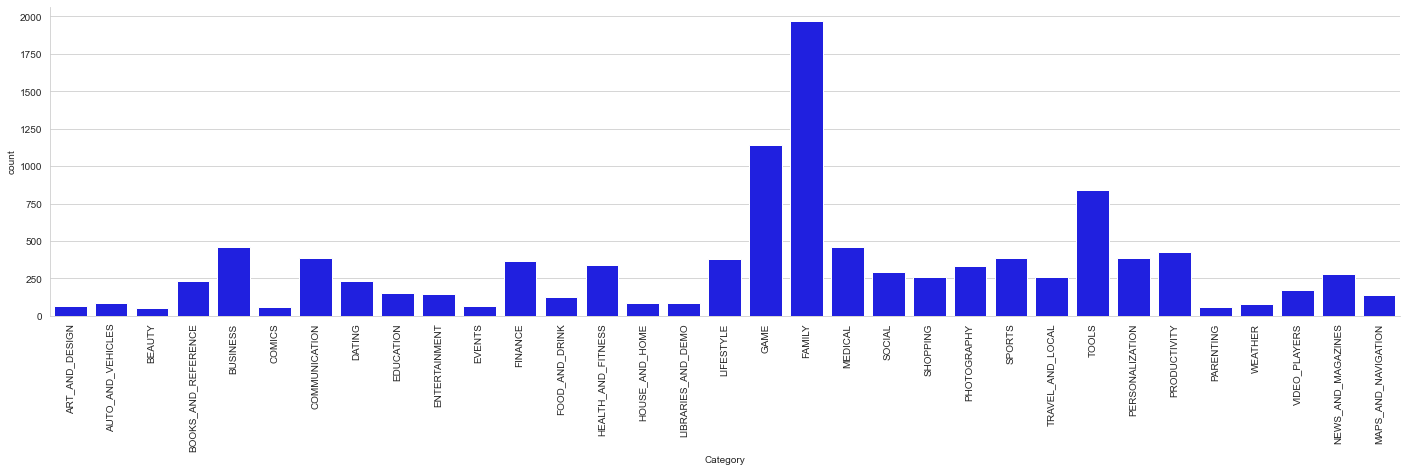

In [64]:
plt.figure(figsize=(16,8))
g = sns.factorplot("Category", data=df, height= 5, aspect=4, kind="count", color="b")
g.set_xticklabels(rotation=90)

In [65]:
df['Category'].value_counts()

FAMILY                 1968
GAME                   1144
TOOLS                   841
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         390
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     230
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  82
EVENTS                   64
ART_AND_DESIGN           64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: Category, dtype: int64

In [ ]:
sns.barplot(x = 'Category', y = 'Installed count', data = df, kind)

C:\Users\master\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1152x576 with 0 Axes>

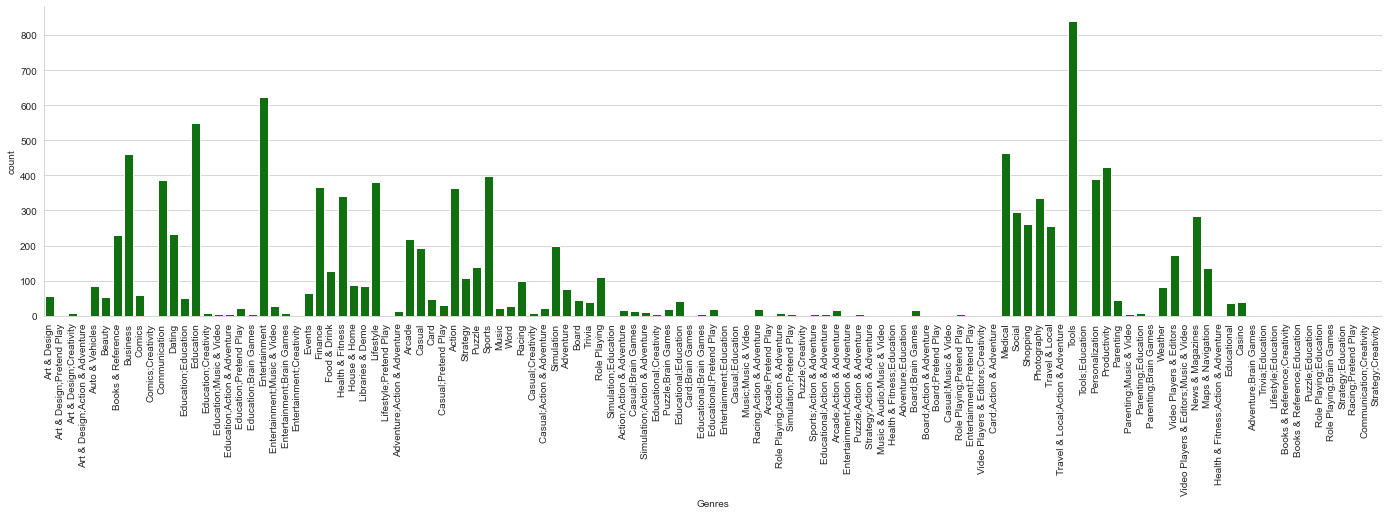

In [69]:
plt.figure(figsize=(16,8))
g = sns.factorplot("Genres", data=df, height= 5, aspect=4, kind="count", color="g")
g.set_xticklabels(rotation=90)

In [84]:
df['Genres'].value_counts().tail(5)

Communication;Creativity               1
Health & Fitness;Action & Adventure    1
Strategy;Education                     1
Music & Audio;Music & Video            1
Books & Reference;Creativity           1
Name: Genres, dtype: int64

In [80]:
df['Category'].value_counts().head()

FAMILY      1968
GAME        1144
TOOLS        841
MEDICAL      463
BUSINESS     460
Name: Category, dtype: int64

In [82]:
df[df['Category'] == 'FAMILY']['Genres']

2014      Entertainment;Music & Video
2015               Casual;Brain Games
2016     Adventure;Action & Adventure
2017               Casual;Brain Games
2018           Educational;Creativity
                     ...             
10821                   Entertainment
10827                       Education
10834                       Education
10836                       Education
10837                       Education
Name: Genres, Length: 1968, dtype: object

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  int32  
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  float64
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  float64
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(3), int32(1), object(9)
memory usage: 1.4+ MB


In [91]:
g = df.groupby(['Category','Genres'])
g.first()

App  \
Category          Genres                                                                                     
ART_AND_DESIGN    Art & Design                              Photo Editor & Candy Camera & Grid & ScrapBook   
                  Art & Design;Action & Adventure                                   Mcqueen Coloring pages   
                  Art & Design;Creativity                            Pixel Draw - Number Art Coloring Book   
                  Art & Design;Pretend Play                                            Coloring book moana   
AUTO_AND_VEHICLES Auto & Vehicles                                              Monster Truck Stunt 3D 2019   
...                                                                                                    ...   
TRAVEL_AND_LOCAL  Travel & Local;Action & Adventure                         Ascape VR: 360° Virtual Travel   
VIDEO_PLAYERS     Video Players & Editors                                                          YouTube   
                  Video Players & Editors;Creativity                                          Video Editor   
                  Video Players & Editors;Music & Video                                Cartoon Network App   
WEATHER           Weather                                The Weather Channel: Rain Forecast & Storm Alerts   

                                                         Rating   Reviews  \
Category          Genres                                                    
ART_AND_DESIGN    Art & Design                              4.1       159   
                  Art & Design;Action & Adventure           4.3        61   
                  Art & Design;Creativity                   4.3       967   
                  Art & Design;Pretend Play                 3.9       967   
AUTO_AND_VEHICLES Auto & Vehicles                           4.2       367   
...                                                         ...       ...   
TRAVEL_AND_LOCAL  Travel & Local;Action & Adventure         4.1       890   
VIDEO_PLAYERS     Video Players & Editors                   4.3  25655305   
                  Video Players & Editors;Creativity        4.1    159622   
                  Video Players & Editors;Music & Video     4.0    119202   
WEATHER           Weather                                   4.4   1558437   

                                                                       Size  \
Category          Genres                                                      
ART_AND_DESIGN    Art & Design                                          19M   
                  Art & Design;Action & Adventure                      7.0M   
                  Art & Design;Creativity                              2.8M   
                  Art & Design;Pretend Play                             14M   
AUTO_AND_VEHICLES Auto & Vehicles                                       25M   
...                                                                     ...   
TRAVEL_AND_LOCAL  Travel & Local;Action & Adventure                    7.6M   
VIDEO_PLAYERS     Video Players & Editors                Varies with device   
                  Video Players & Editors;Creativity                    23M   
                  Video Players & Editors;Music & Video  Varies with device   
WEATHER           Weather                                Varies with device   

                                                             Installs  Type  \
Category          Genres                                                      
ART_AND_DESIGN    Art & Design                           1.000000e+04  Free   
                  Art & Design;Action & Adventure        1.000000e+05  Free   
                  Art & Design;Creativity                1.000000e+05  Free   
                  Art & Design;Pretend Play              5.000000e+05  Free   
AUTO_AND_VEHICLES Auto & Vehicles                        1.000000e+05  Free   
...                                                               ...   ...   
TRAVEL_AND

## Bivariate Analysis

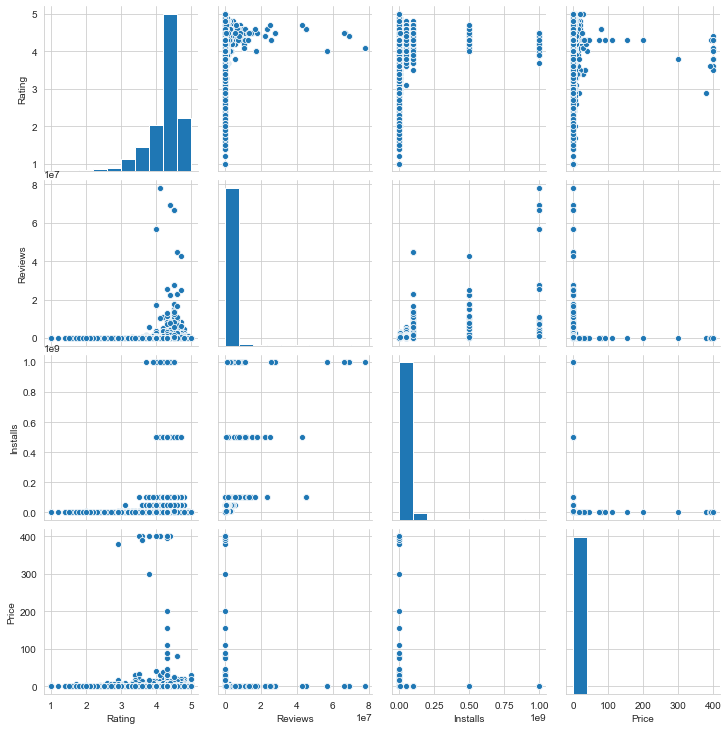

In [112]:
sns.pairplot(df)

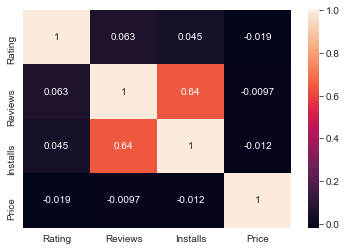

In [117]:
sns.heatmap(df.corr(), annot= True)

In [119]:
# Rating is slightly negatively correlated with Reviews, Installs, Price features
# Reviews is more positively correlated with Installs and marginally with Ratings while marginally negative with Price
# Installs is marginally negative correlated with Price
# There is very low effect of Rating, Reviews and Installs on Price.

# More important factor to consider here is the positive correlation between Installs and Reviews. More Installations lead to Cutomer posting their Reviews

In [123]:
# Joint Probability
pd.crosstab(index = df['Category'], columns = df['Genres'], margins = True)

Genres,Action,Action;Action & Adventure,Adventure,Adventure;Action & Adventure,Adventure;Brain Games,Adventure;Education,Arcade,Arcade;Action & Adventure,Arcade;Pretend Play,Art & Design,...,Travel & Local,Travel & Local;Action & Adventure,Trivia,Trivia;Education,Video Players & Editors,Video Players & Editors;Creativity,Video Players & Editors;Music & Video,Weather,Word,All
Category,,,,,,,,,,,,,,,,,,,,,
ART_AND_DESIGN,0,0,0,0,0,0,0,0,0,57,...,0,0,0,0,0,0,0,0,0,64
AUTO_AND_VEHICLES,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,85
BEAUTY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,53
BOOKS_AND_REFERENCE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,230
BUSINESS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,460
COMICS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,60
COMMUNICATION,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,387
DATING,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,234
EDUCATION,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,156


In [124]:
# The proability of app belonging to the category 'Family' is maximum

In [131]:
plt.figure(figsize= (18,6))

sns.distplot(df.groupby('Category'), df.groupby('Category')['Rating'].mean(), color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 

# plt.title('Error Rate vs K value')
# plt.xlabel('K')
# plt.ylabel('Error Rate')

TypeError: distplot() got an unexpected keyword argument 'linestyle'

<Figure size 1296x432 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

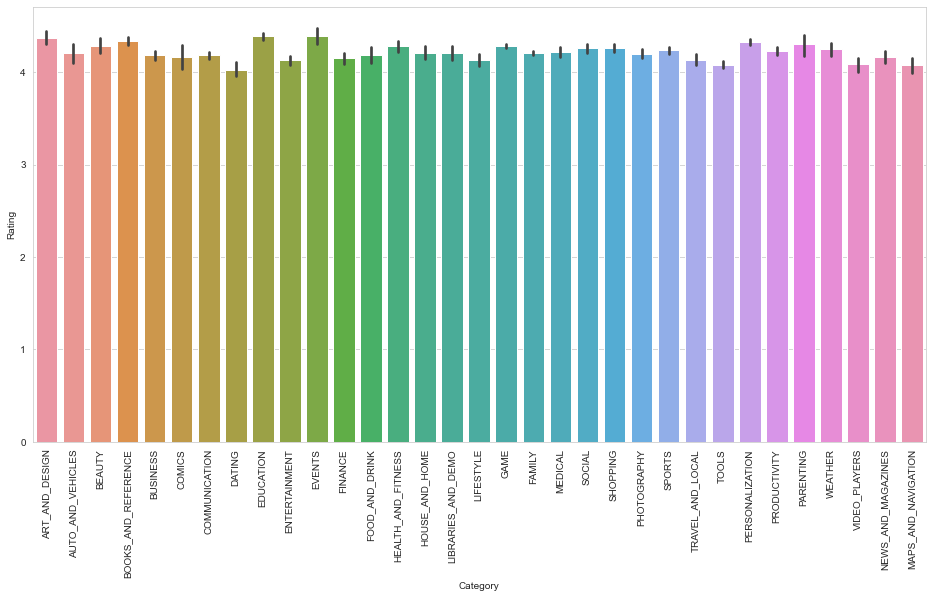

In [143]:
plt.figure(figsize = (16, 8))
# m= df.groupby('Category')['Rating'].mean()
sns.barplot(x = 'Category', y = 'Rating', data = df, estimator = np.mean)
plt.xticks(rotation = 90)

In [152]:
df.groupby('Category')['Rating'].mean().sort_values(ascending = False).tail()

Category
ENTERTAINMENT          4.126174
VIDEO_PLAYERS          4.084000
TOOLS                  4.079667
MAPS_AND_NAVIGATION    4.075182
DATING                 4.025641
Name: Rating, dtype: float64

In [153]:
# Top 5 categories by Ratings are : Events, Education, Art & Design, Books & Preference, Personalization
# Last 5 categories by Rating are : Entertainment, Video Players, Tools, Maps and Navigation, Dating

In [157]:
sns.distplot(x= 'Rating', y= 'Price', data= df, hue = "Genres", kind = 'Scatter')

TypeError: distplot() got an unexpected keyword argument 'x'

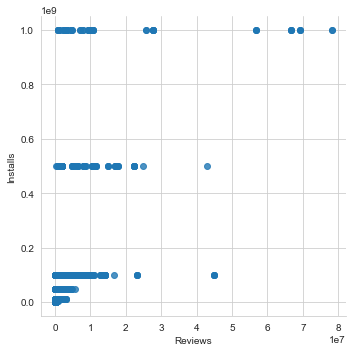

In [165]:
sns.lmplot(x= 'Reviews', y= 'Installs',fit_reg = False, data = df)